In [190]:
import keras
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
import keras.backend.tensorflow_backend as tfback
from keras.utils import np_utils
from keras import backend as K
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [191]:
#Load the Dataset
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

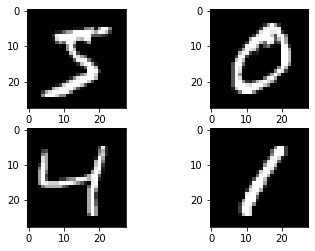

In [192]:
#Visualise the image
plt.subplot(221)
plt.imshow(X_train[0],cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1],cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2],cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3],cmap=plt.get_cmap('gray'))

plt.show()

In [193]:
#th
K.set_image_data_format='channels-first'
seed=7#its like random_size in ML
np.random.seed(seed)

In [194]:
X_train=X_train.reshape(X_train.shape[0],1,28,28).astype('float32')
X_test=X_test.reshape(X_test.shape[0],1,28,28).astype('float32')

In [195]:
X_train=X_train/255
X_test=X_test/255

In [196]:
#Onehot encoding, output will be in the form of a vector[0,0,0,0,0,0,0,1,0,0],here the input image is number7
Y_train=np_utils.to_categorical(Y_train)
Y_test=np_utils.to_categorical(Y_test)

In [197]:
num_of_classes=Y_train.shape[1]

In [198]:
def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]
	
	
	
tfback._get_available_gpus = _get_available_gpus
tfback._get_available_gpus()



[]

In [199]:
tfback._get_available_gpus = _get_available_gpus
tfback._get_available_gpus()


#tf.config.experimental_list_devices()
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:XLA_CPU:0', device_type='XLA_CPU')]

In [200]:
def base_line():
    model=Sequential()
    model.add(Conv2D(8,(3,3),input_shape=(1,28,28),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    #Flatten converts n * n matric into single dimension scalar
    model.add(Dense(4,activation='softmax'))
    model.add(Dense(num_of_classes,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

model=base_line()


    
    

In [201]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=3,batch_size=32,verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
 - 16s - loss: 1.5455 - accuracy: 0.4012 - val_loss: 1.2397 - val_accuracy: 0.4121
Epoch 2/3
 - 15s - loss: 1.1508 - accuracy: 0.4250 - val_loss: 1.0953 - val_accuracy: 0.4235
Epoch 3/3
 - 18s - loss: 1.0640 - accuracy: 0.4403 - val_loss: 1.0501 - val_accuracy: 0.4477


In [202]:
model.save('model.h5')


In [203]:
scores=model.evaluate(X_test,Y_test,verbose=0)

In [204]:
score = 100 - scores[1]*100
print("CNN error: %s" % score)

CNN error: 55.230000615119934
